In [1]:
import pandas as pd
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [2]:
model = Prophet()

In [3]:
all_data = pd.read_csv('covid_cases.csv')
all_data.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20
0,0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,...,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837
1,1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,...,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302
2,2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,...,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730
3,3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,...,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955
4,4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,...,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493


In [4]:
us_cases = all_data[all_data['Country/Region'] == 'US']
us_cases_by_day = us_cases.iloc[0,5:]
us_cases_by_day.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
Name: 246, dtype: object

In [5]:
print(len(us_cases_by_day))
daily_increases = [(us_cases_by_day[i+1]-us_cases_by_day[i]) for i in range(0,len(us_cases_by_day)-1)]
print(len(daily_increases))

318
317


In [6]:
import matplotlib.pyplot as plt

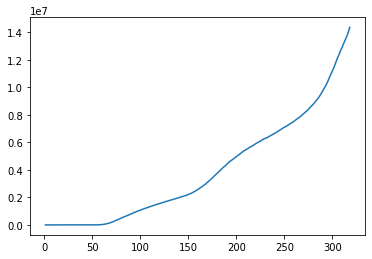

In [7]:
plt.plot(np.arange(1,len(us_cases_by_day)+1), np.array(us_cases_by_day.values))
plt.show()

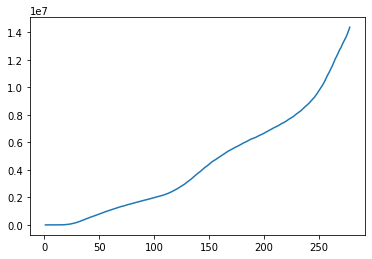

In [8]:
us_data = us_cases_by_day[40:]
plt.plot(np.arange(1,len(us_data)+1), np.array(us_data.values))
plt.show()

In [9]:
us_data

3/2/20            55
3/3/20            74
3/4/20           107
3/5/20           184
3/6/20           237
              ...   
11/30/20    13541221
12/1/20     13721858
12/2/20     13921913
12/3/20     14139577
12/4/20     14367462
Name: 246, Length: 278, dtype: object

In [10]:
df = pd.DataFrame(us_data).reset_index()
df.columns = ['ds', 'y']
df

,ds,y
0,3/2/20,55
1,3/3/20,74
2,3/4/20,107
3,3/5/20,184
4,3/6/20,237
...,...,...
273,11/30/20,13541221
274,12/1/20,13721858
275,12/2/20,13921913
276,12/3/20,14139577


In [20]:
increase = pd.DataFrame(daily_increases[40:]).reset_index()
increase.columns = ['ds', 'y']
increase

,ds,y
0,0,19
1,1,33
2,2,77
3,3,53
4,4,166
...,...,...
272,272,157851
273,273,180637
274,274,200055
275,275,217664


In [21]:
increase['ds'] = df['ds'][:-1]

In [22]:
increase

,ds,y
0,3/2/20,19
1,3/3/20,33
2,3/4/20,77
3,3/5/20,53
4,3/6/20,166
...,...,...
272,11/29/20,157851
273,11/30/20,180637
274,12/1/20,200055
275,12/2/20,217664


In [23]:
from copy import deepcopy
increase_data = deepcopy(increase)

In [24]:
increase_data['y'] = increase_data['y']/1e6

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [25]:
increase_data

,ds,y
0,3/2/20,0.000019
1,3/3/20,0.000033
2,3/4/20,0.000077
3,3/5/20,0.000053
4,3/6/20,0.000166
...,...,...
272,11/29/20,0.157851
273,11/30/20,0.180637
274,12/1/20,0.200055
275,12/2/20,0.217664


In [26]:
def load_data(data, time_step=7, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step].reshape(-1,n_days,1)
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step].reshape(-1,n_days,1)
    y_validate = validate[:, time_step:]

    return [x_train, y_train, x_validate, y_validate]

In [27]:
increase_data = np.array(increase['y'])/1e6

In [28]:
increase_data.astype('float32')

array([1.90000e-05, 3.30000e-05, 7.70000e-05, 5.30000e-05, 1.66000e-04,
       1.16000e-04, 7.50000e-05, 1.88000e-04, 3.65000e-04, 4.39000e-04,
       6.33000e-04, 7.59000e-04, 2.34000e-04, 1.46700e-03, 1.83300e-03,
       2.65700e-03, 4.49400e-03, 6.36700e-03, 5.99500e-03, 8.83000e-03,
       1.12310e-02, 1.06120e-02, 1.20750e-02, 1.78400e-02, 1.86800e-02,
       1.96070e-02, 1.88790e-02, 2.20820e-02, 2.63160e-02, 2.58830e-02,
       3.03870e-02, 3.19700e-02, 3.30150e-02, 2.81970e-02, 3.01730e-02,
       3.14100e-02, 3.21950e-02, 3.45820e-02, 3.34850e-02, 2.93080e-02,
       2.69270e-02, 2.58090e-02, 2.85640e-02, 3.01650e-02, 3.14010e-02,
       3.26690e-02, 2.79270e-02, 2.56890e-02, 2.84200e-02, 2.60600e-02,
       2.93140e-02, 3.31840e-02, 3.37510e-02, 3.15720e-02, 2.68440e-02,
       2.31870e-02, 2.46610e-02, 2.78110e-02, 2.94870e-02, 3.42400e-02,
       2.77640e-02, 2.44570e-02, 2.33820e-02, 2.45100e-02, 2.50890e-02,
       2.77360e-02, 2.67490e-02, 2.49480e-02, 1.88710e-02, 1.942

In [70]:
n_days = 7
x_t, y_t, x_v, y_v = load_data(increase_data, n_days, 1, 0.7)

total data:  (270, 8)


## Implement GRU here

In [31]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, GRU
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [71]:
K.clear_session()
model = Sequential()
model.add(GRU(50, input_shape=(n_days, 1), activation='relu', kernel_initializer='lecun_uniform', return_sequences=True))
model.add(GRU(50, activation='relu', kernel_initializer='lecun_uniform', return_sequences=True))
model.add(GRU(50, activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

In [72]:
opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt)
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [73]:
history_model = model.fit(x_t, y_t, epochs=30, batch_size=8,  verbose=1, shuffle=True)#, callbacks=[early_stop])

Epoch 1/30
24/24 [==============================] - 0s 10ms/step - loss: 8.5315e-05
Epoch 2/30
24/24 [==============================] - 0s 8ms/step - loss: 4.6043e-05
Epoch 3/30
24/24 [==============================] - 0s 8ms/step - loss: 5.3629e-05
Epoch 4/30
24/24 [==============================] - 0s 9ms/step - loss: 5.8137e-05
Epoch 5/30
24/24 [==============================] - 0s 9ms/step - loss: 4.2121e-05
Epoch 6/30
24/24 [==============================] - 0s 9ms/step - loss: 4.1838e-05
Epoch 7/30
24/24 [==============================] - 0s 9ms/step - loss: 4.2192e-05
Epoch 8/30
24/24 [==============================] - 0s 9ms/step - loss: 4.0840e-05
Epoch 9/30
24/24 [==============================] - 0s 9ms/step - loss: 4.3447e-05
Epoch 10/30
24/24 [==============================] - 0s 9ms/step - loss: 5.6311e-05
Epoch 11/30
24/24 [==============================] - 0s 9ms/step - loss: 4.1460e-05
Epoch 12/30
24/24 [==============================] - 0s 9ms/step - loss: 4.0831e-05


In [74]:
y_pred = model.predict(x_v)*1e6

In [75]:
y_pred[-1]

array([173578.62], dtype=float32)

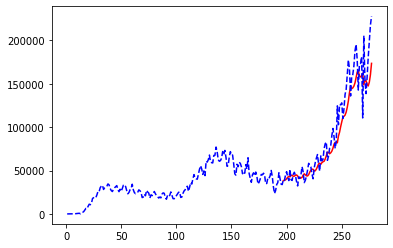

In [76]:
plt.plot(np.arange(len(y_t)+1+n_days,len(y_t)+1+n_days+len(y_pred)),y_pred,'r')
plt.plot(np.arange(1,len(increase_data)+1), increase_data*1e6,'b--')
plt.show()

In [38]:
print(y_pred.shape)
print(y_v.shape)

(81, 1)
(81, 1)


In [49]:
increase_data.shape

(277,)

In [112]:
cumulative = deepcopy(df['y'])
inc = deepcopy(increase_data)

In [113]:
cumulative = np.array(cumulative)
cumulative.shape

(278,)

In [114]:
inc.shape

(277,)

In [115]:
cumulative[-1]

14367462

In [116]:
inc[-1]

0.227885

In [120]:
def predict_future(cumulative, data, days = 30):
    for i in range(days):
        new_x = data[-n_days:].reshape(1,n_days,1)
        new_y = model.predict(new_x)[0][0]
        #print(new_y)
        data = np.append(data, np.array(new_y))
        last_day_cumul = int(new_y*1e6) + cumulative[-1]
        #cumulative = np.append(cumulative, last_day_cumul)
        print(cumulative[-1])
    return [cumulative, data]

In [121]:
cc, dd = predict_future(cumulative, inc, 30)

0.18253058
14549992
0.18179117
14731783
0.17941906
14911202
0.17663924
15087841
0.17358682
15261427
0.17004943
15431476
0.16561595
15597091
0.16095208
15758043
0.15779205
15915835
0.15460536
16070440
0.15152913
16221969
0.14851528
16370484
0.14558567
16516069
0.14276107
16658830
0.14008307
16798913
0.13755372
16936466
0.13512282
17071588
0.1327918
17204379
0.13055503
17334934
0.12835221
17463286
0.1262315
17589517
0.12418656
17713703
0.12221408
17835917
0.12031157
17956228
0.11847513
18074703
0.11670078
18191403
0.11496862
18306371
0.113267735
18419638
0.111615
18531253
0.11000794
18641260


In [122]:
cc.shape

(308,)

In [123]:
dd.shape

(307,)

In [124]:
cc

array([55, 74, 107, 184, 237, 403, 519, 594, 782, 1147, 1586, 2219, 2978,
       3212, 4679, 6512, 9169, 13663, 20030, 26025, 34855, 46086, 56698,
       68773, 86613, 105293, 124900, 143779, 165861, 192177, 218060,
       248447, 280417, 313432, 341629, 371802, 403212, 435407, 469989,
       503474, 532782, 559709, 585518, 614082, 644247, 675648, 708317,
       736244, 761933, 790353, 816413, 845727, 878911, 912662, 944234,
       971078, 994265, 1018926, 1046737, 1076224, 1110464, 1138228,
       1162685, 1186067, 1210577, 1235666, 1263402, 1290151, 1315099,
       1333970, 1353397, 1376122, 1397085, 1424243, 1449498, 1473514,
       1491829, 1513816, 1534871, 1557933, 1583798, 1607109, 1628212,
       1648158, 1666505, 1685956, 1704489, 1727357, 1751612, 1775428,
       1794465, 1811393, 1832782, 1852788, 1874156, 1899505, 1920910,
       1938572, 1956064, 1974425, 1995376, 2018418, 2043332, 2068600,
       2087619, 2107075, 2130768, 2157267, 2185134, 2216115, 2248032,
       227400

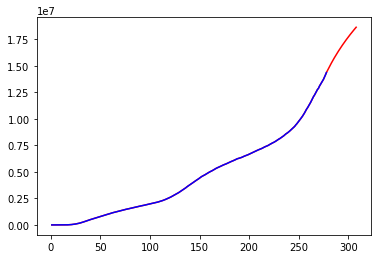

In [148]:
plt.plot(np.arange(1,len(cc)+1),cc,'r')
plt.plot(np.arange(1,len(us_data)+1), np.array(us_data.values),'b')
plt.show()

In [150]:
model.save('GRU_daily_increase.h5')